In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([
    [80, 3],
    [120, 3],
    [100, 2],
    [150, 4]
])

y = np.array([310, 390, 325, 530])

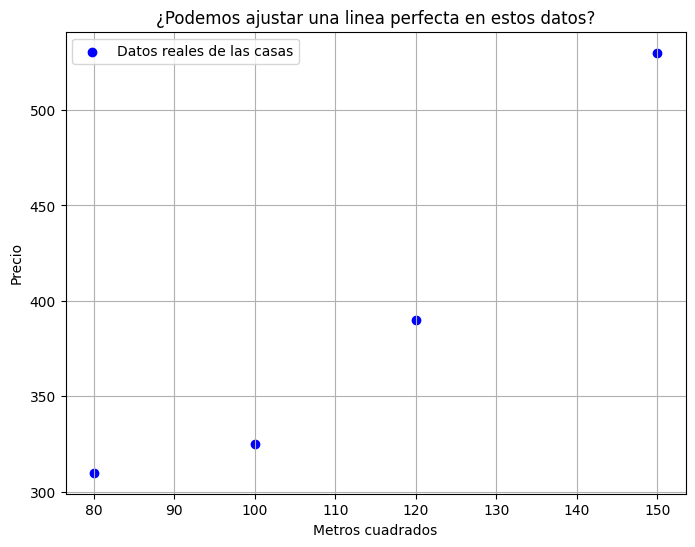

In [2]:
plt.figure(figsize = (8, 6))
plt.scatter(X[:, 0], y, color = 'blue', label='Datos reales de las casas')
plt.xlabel("Metros cuadrados")
plt.ylabel("Precio")
plt.title("¿Podemos ajustar una linea perfecta en estos datos?")
plt.grid(True)
plt.legend()
plt.show()


In [4]:
X_bias = np.c_[np.ones((4, 1)), X]

A = X_bias.T @ X_bias
b = X_bias.T @ y

print(f"Matriz A: {A}")
print(f"Vector b: {b}")

Matriz A: [[4.00e+00 4.50e+02 1.20e+01]
 [4.50e+02 5.33e+04 1.40e+03]
 [1.20e+01 1.40e+03 3.80e+01]]
Vector b: [  1555. 183600.   4870.]


In [5]:
A_inversa = np.linalg.inv(A)
print(A_inversa)

[[ 5.73684211e+00 -2.63157895e-02 -8.42105263e-01]
 [-2.63157895e-02  7.01754386e-04 -1.75438596e-02]
 [-8.42105263e-01 -1.75438596e-02  9.38596491e-01]]


In [6]:
theta_con_inversa = A_inversa @ b
print(f"Pesos del modelo (theta): {np.round(theta_con_inversa, 2)}")

Pesos del modelo (theta): [-11.84   2.48  40.44]


In [7]:
theta_con_solve = np.linalg.solve(A, b)
print(f"Pesos del modelo (theta) con solve: {np.round(theta_con_solve, 2)}")

Pesos del modelo (theta) con solve: [-11.84   2.48  40.44]


In [8]:
theta = theta_con_solve
predicciones = X_bias @ theta

print(f"Precios reales: {y}")
print(f"Precios predichos: {np.round(predicciones, 2)}")

Precios reales: [310 390 325 530]
Precios predichos: [308.07 407.37 317.28 522.28]


[193.15789474 547.10526316]


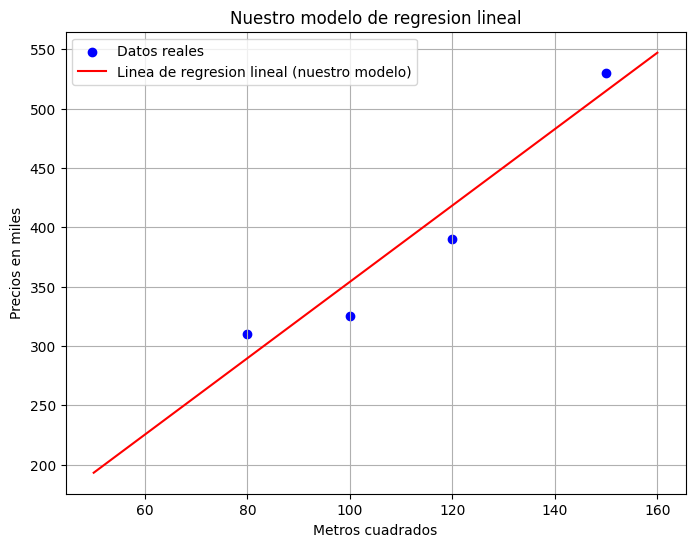

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], y, color ='blue', label='Datos reales')
X_linea = np.array([[50], [160]])
X_linea_bias = np.c_[np.ones((2, 1)), X_linea, np.array([[2], [4]])]
y_linea = X_linea_bias @ theta
print(y_linea)
plt.plot(X_linea, y_linea, "r-", label='Linea de regresion lineal (nuestro modelo)')

plt.xlabel("Metros cuadrados")
plt.ylabel("Precios en miles")
plt.title("Nuestro modelo de regresion lineal")
plt.grid(True)
plt.legend()
plt.show()
